# **Aufgabe 1 - Temperaturabhängige Luftdichte**

Die Dichte von Luft bei 1 bar Umgebungsdruck ist indirekt Proportional zur Temperatur. Dieser Zusammenhang ist für einige Temperaturwerte in folgender Abbildung dargestellt:

![alt text](Abbildungen/plot_density.png)

Mathematisch wird dieser Zusammenhang mit der idealen Gasgleichung beschrieben:

$$ \rho = \frac{p}{R_S \, T} $$

mit der Luftdichte $\rho$, dem Druck $p$, der spezifischen Gaskonstante für Luft $R_S$ und der Temperatur T. Gehen Sie im Rahmen dieses Belegs von einer spezifischen Gaskonstante von $R_S = 287,06\,\text{J/(kg\,K)}$ und einem Luftdruck von $101\,325\,\text{Pa}$ aus.

### **Teilaufgaben**

1. Laden Sie die Rhodaten der Luftdichte aus der Datei `dichte.csv` ein und speichern Sie diese in zwei Numpy-Arrays.
2. Erstellen Sie eine Funktion, mit deren Hilfe ein beliebiger Wert zwischen zwei Stützstellen linear interpoliert werden kann.
3. Interpolieren Sie mit dieser Funktion die Luftdichte bei $T = 260\,\text{K}$, $T = 325\,\text{K}$ und $T = 490\,\text{K}$. Visualisieren Sie die interpolierten Wertepaare und die Ausgangsdaten in einem Diagramm. Achten Sie darauf, dass die interpolierten Werte und Originaldaten unterschiedlich farblich gekennzeichnet sind.
4. Nutzen Sie die ideale Gasgleichung, um für die drei interpolierten Dichtewerte den relativen Fehler durch die lineare Interpolation zu bestimmen.

### **Lösung** - Aufgabe 1

### ***Algorithmische Lösung technischer Problem WS 2024/25***

### Studenten:

+ #### **Diego Espinosa**, MN: 61505, Studiengang: BENG
+ #### **Imad Sghir**, MN: 71767, Studiengang: BENG

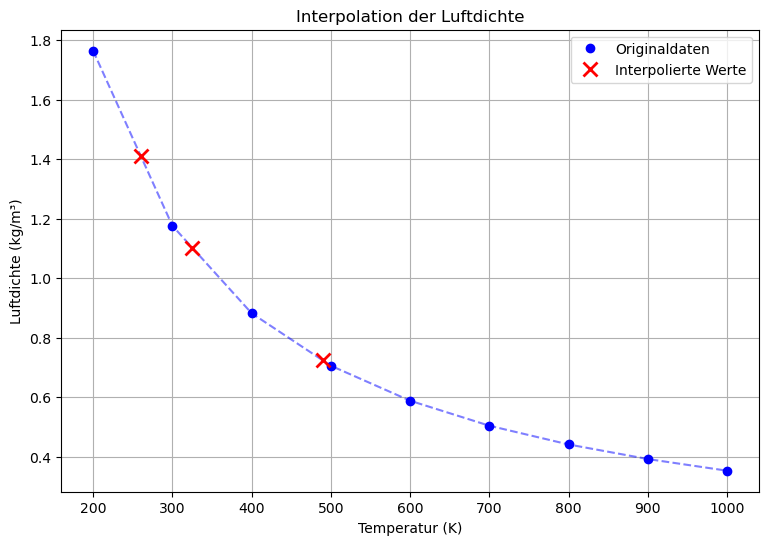

Temperatur: 260 K, Interpolierte Dichte: 1.41 kg/m³, Ideale Dichte: 1.36 kg/m³, Relativer Fehler: 4.00%
Temperatur: 325 K, Interpolierte Dichte: 1.10 kg/m³, Ideale Dichte: 1.09 kg/m³, Relativer Fehler: 1.56%
Temperatur: 490 K, Interpolierte Dichte: 0.72 kg/m³, Ideale Dichte: 0.72 kg/m³, Relativer Fehler: 0.44%


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Teil 1: die Rohdaten der Luftdichte aus der Datei dichte.csv laden und speichern
temperatur, dichte = np.genfromtxt('Daten/dichte.csv', delimiter=",", unpack=True)

# Teil 2: Funktion erstellen, die zwischen zwei Stützstellen interpoliert
def lineare_interpolation(x):
    for index in range(len(temperatur) - 1):
        if temperatur[index] <= x <= temperatur[index + 1]:  # Bedingung: x muss zwischen zwei Stützstellen sein
            dichte_neu = (x - temperatur[index]) * (dichte[index + 1] - dichte[index]) / (temperatur[index + 1] - temperatur[index]) + dichte[index]
            return dichte_neu
    raise ValueError("x-Wert liegt nicht zwischen den Stützstellen!")  # Fehlermeldung, falls Bedingung nicht erfüllt

# Teil 3: Interpolation und Visualisierung

# Gegebene Temperaturen 
temperaturen_interp = [260, 325, 490] # Einheit K
dichten_interp = [] # Einheit kg/m³

# Interpolation
for T in temperaturen_interp:
    dichte_interpoliert = lineare_interpolation(T)
    dichten_interp.append(dichte_interpoliert)

# Visualisierung
plt.figure(figsize=(9, 6))
plt.plot(temperatur, dichte, 'o', label='Originaldaten', color='blue')
plt.plot(temperatur, dichte, linestyle='--', color='blue', alpha=0.5)
plt.plot(temperaturen_interp, dichten_interp, 'x', label='Interpolierte Werte', color='red', markersize=10, markeredgewidth=2)

plt.xlabel('Temperatur (K)')
plt.ylabel('Luftdichte (kg/m³)')
plt.title('Interpolation der Luftdichte')
plt.legend()
plt.grid()
plt.show()

# Teil 4 : Relative Fehler

# Konstanten
p = 101325  # Druck in Pa
R_S = 287.06  # spezifische Gaskonstante in J/(kg*K)

# Berechnung der Dichten aus der idealen Gasgleichung
dichten_ideal = [p / (R_S * T) for T in temperaturen_interp]

# Berechnung des relativen Fehlers
relative_fehler = [(dichten_interp[i] - dichten_ideal[i]) / dichten_ideal[i] * 100 for i in range(len(dichten_interp))]

# Ausgabe der Ergebnisse
for i, T in enumerate(temperaturen_interp):
    print(f'Temperatur: {T} K, Interpolierte Dichte: {dichten_interp[i]:.2f} kg/m³, Ideale Dichte: {dichten_ideal[i]:.2f} kg/m³, Relativer Fehler: {relative_fehler[i]:.2f}%')
    

### Aufhürliche Erläuterung des Codes.

### **Teil 0:**

#### 1. Importieren der Bibliotheken:

```python
import numpy as np
import matplotlib.pyplot as plt
```

+ Importiert ```numpy``` für mathematische Operationen und ```matplotlib.pyplot``` für die Visualisierung.

### **Teil 1:**

#### 2. Daten aus der Datei ```dichte.csv``` laden:

```python
temperatur, dichte = np.genfromtxt('Daten\dichte.csv', delimiter=",", unpack=True)
```

+ ```np.genfromtxt()``` lädt die Temperatur- und Dichtewerte aus der Datei ```dichte.csv```.
+ ```delimiter=","``` gibt an, dass die Werte in der Datei durch Kommas getrennt sind.
+ ```unpack=True``` entpackt die Daten in zwei separate Arrays: ```temperatur``` für die Temperaturwerte und ```dichte``` für die Dichtewerte.


### **Teil 2:**

#### 3. Definition der Interpolationsfunktion ```lineare_interpolation(x)```:

```python
def lineare_interpolation(x):
    for index in range(len(temperatur) - 1):
        if temperatur[index] <= x <= temperatur[index + 1]:  
            dichte_neu = (x - temperatur[index]) * (dichte[index + 1] - dichte[index]) / (temperatur[index + 1] - temperatur[index]) + dichte[index]
            return dichte_neu
    raise ValueError("x-Wert liegt nicht zwischen den Stützstellen!")
```

+ Definiert eine Funktion, um die Dichte für einen gegebenen Temperaturwert ```x``` zu interpolieren.
+ Schleife ```for```: Durchläuft die ```temperatur```-Wertepaare. Für jedes Paar prüft die Schleife, ob ```x``` zwischen diesen beiden Werten liegt.
+ Interpolation: Wenn ```x``` im Bereich liegt, berechnet die Funktion ```dichte_neu``` mithilfe der Formel für lineare Interpolation.
+ Fehlermeldung: Wenn ```x``` außerhalb des Bereichs liegt, gibt die Funktion eine Fehlermeldung aus.


### **Teil 3:**

#### 4. Gegebene Temperaturen zur Interpolation:

```python
temperaturen_interp = [260, 325, 490] # Einheit K
dichten_interp = [] # Einheit kg/m³
```

+ Definiert die Liste ```temperaturen_interp```, die die Temperaturen enthält, für die die Dichtewerte interpoliert werden sollen.
+ ```dichten_interp``` ist eine leere Liste, um die interpolierten Dichtewerte zu speichern.


#### 5. Berechnung der interpolierten Werte:

```python
for T in temperaturen_interp:
    dichte_interpoliert = lineare_interpolation(T)
    dichten_interp.append(dichte_interpoliert)
```

+ Iteriert über jeden Temperaturwert ```T``` in ```temperaturen_interp```.
+ Berechnet für jede Temperatur ```T``` die interpolierte Dichte mit ```lineare_interpolation``` und speichert das Ergebnis in ```dichten_interp```.


#### 6. Visualisierung der Daten und interpolierten Werte:

```python
plt.figure(figsize=(9, 6))
plt.plot(temperatur, dichte, 'o', label='Originaldaten', color='blue')
plt.plot(temperatur, dichte, linestyle='--', color='blue', alpha=0.5)
plt.plot(temperaturen_interp, dichten_interp, 'x', label='Interpolierte Werte', color='red', markersize=10, markeredgewidth=2)

plt.xlabel('Temperatur (K)')
plt.ylabel('Luftdichte (kg/m³)')
plt.title('Interpolation der Luftdichte')
plt.legend()
plt.grid()
plt.show()
```

+ Erstellen des Plot-Fensters: ```plt.figure(figsize=(9, 6))``` legt die Größe des Diagramms fest.
+ Plot der Originaldaten:
    + ```plt.plot(temperatur, dichte, 'o', ...)``` zeigt die Originaldaten als blaue Punkte an.
    + ```plt.plot(temperatur, dichte, linestyle='--', ...)``` fügt eine gepunktete Linie hinzu, die die Originaldaten verbindet.
+ Plot der interpolierten Werte:
    + ```plt.plot(temperaturen_interp, dichten_interp, 'x', ...)``` zeigt die interpolierten Werte als rote "x"-Markierungen an, mit vergrößerter Größe und dickerer Linienbreite.
+ Diagramm-Beschriftungen und Legende:
    + ```plt.xlabel()``` und ```plt.ylabel()``` beschriften die Achsen.
    + ```plt.title()``` fügt einen Titel hinzu.
    + ```plt.legend()``` zeigt eine Legende an.
    + ```plt.grid()``` aktiviert das Gitter.


### **Teil 4**

#### 7. Konstanten für die ideale Gasgleichung definieren:

```python
p = 101325
R_S = 287.06
```

+ ```p```: Druck in Pascal.
+ ```R_S```: spezifische Gaskonstante für Luft in J/(kg*K).


#### 8. Berechnung der theoretischen Dichtewerte:

```python
dichten_ideal = [p / (R_S * T) for T in temperaturen_interp]
```

+ Liste ```dichten_ideal```: Berechnet die theoretische Dichte für jede Temperatur in ```temperaturen_interp``` basierend auf der idealen Gasgleichung:

```math
dichte\_ideal = \frac{p}{R_s \cdot T}
```

#### 9. Berechnung des relativen Fehlers:

```python
relative_fehler = [(dichten_interp[i] - dichten_ideal[i]) / dichten_ideal[i] * 100 for i in range(len(dichten_interp))]
```

+ Liste ```relative_fehler```: Berechnet für jede interpolierte Dichte den relativen Fehler im Vergleich zur theoretischen Dichte:

```math
relativer\_fehler= \frac{dichten\_interp - dichten\_ideal}{dichten\_ideal} \cdot 100
```

#### 10. Ausgabe der Ergebnisse:

```python
for i, T in enumerate(temperaturen_interp):
    print(f'Temperatur: {T} K, Interpolierte Dichte: {dichten_interp[i]:.2f} kg/m³, Ideale Dichte: {dichten_ideal[i]:.2f} kg/m³, Relativer Fehler: {relative_fehler[i]:.2f}%')
```

+ Schleife ```for```: Durchläuft jede Temperatur ```T``` in ```temperaturen_interp```.
+ Gibt für jede Temperatur die interpolierte Dichte, die ideale Dichte und den relativen Fehler aus.